In [354]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier 
from sklearn import metrics, preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [355]:
# Loading Dataset
df = pd.read_csv("train.csv")
asm_test = pd.read_csv('assignment-test.csv')

asm_test.head()

,index,EA1,EA2,EA3,EA4,EA5,EA6
0,17354,-0.534913,0.550684,4.017561,3.254904,-0.919559,0.76
1,17355,-0.385155,0.831352,1.340407,-0.006471,-0.303723,91.93
2,17356,-0.412335,0.615746,-2.358232,-1.259382,2.783729,20.00
3,17357,2.012686,-0.158270,-1.064652,0.062409,0.073092,44.03
4,17358,-0.695848,-1.511682,1.489886,-1.733270,-1.767307,382.93


In [356]:
# Randomly, split the data into test/training/validation sets
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

# Separate target and predictors
y_train = train['Class']
x_train = train.drop(['Class'], axis=1)
y_test = test['Class']
x_test = test.drop(['Class'], axis=1)
y_validate = validate['Class']
x_validate = validate.drop(['Class'], axis=1)

In [357]:
adaModel = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.7) #too long if have too many weak estimators
adaModel = adaModel.fit(x_train, y_train)   

In [358]:
prediction = pd.DataFrame(adaModel.predict(asm_test))
# print(prediction)
df_output = asm_test[["index"]]
df_output2 = df_output.assign(Class = prediction)
df_output2.to_csv("adaboost.csv")

df_output2.head()

,index,Class
0,17354,0
1,17355,0
2,17356,0
3,17357,0
4,17358,0


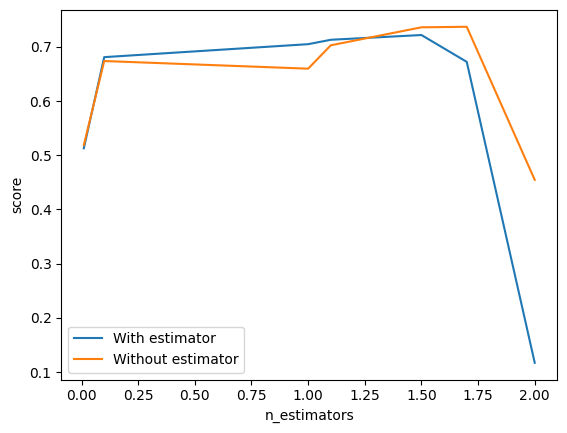

In [359]:
# # estimator_range = [50,100,150,200,250,300]
# # scores = [0.6304347826086956, 0.7238095238095238, 0.7169811320754716, 0.6923076923076923, 0.7184466019417477, 0.6923076923076923, 0.7115384615384616]

learningrate_nestimator = [0.01, 0.1, 1, 1.1, 1.5, 1.7, 2]
scores_withnestimator = [0.5128205128205129, 0.6808510638297872, 0.7047619047619048, 0.7128712871287128, 0.7216494845360825,0.6721311475409836 , 0.11721611721611722 ]

learningrate = [0.01, 0.1, 1, 1.1, 1.5, 1.7, 2]
scores = [0.5185185185185185, 0.6736842105263158,0.6595744680851064, 0.7027027027027026, 0.7358490566037735, 0.736842105263158, 0.4545454545454545]

# plt.figure(figsize=(9,6))
# plt.plot(learningrate, scores)

plt.plot(learningrate, scores_withnestimator, label = "With estimator")
plt.plot(learningrate, scores, label = "Without estimator")
plt.xlabel("n_estimators")
plt.ylabel("score")

plt.legend()
plt.show()

# plt.xlabel("n_estimators", fontsize = 18)
# plt.ylabel("score", fontsize = 18)
# plt.tick_params(labelsize = 16)

# # Visualize plot
# plt.show()
